# GRADED CHALLENGE 1 PHASE 1
`Kevin Boy Gunawan`
<br>

`FTDS-009`

## 1. Introduction

dataset ini merangkum perilaku dari 9000 pemegang kartu kredit selama 6 bulan. dataset memiliki 18 fitur atau kolom yang masing2 kolom mewakili perilaku tiap2 pemegang kartu kredit. dibawa ini merupakan penjelasan untuk masing2 atribut
<br>
<br>
CUSTID : ID masing masing pemegang kartu (Categorical)
<br>
BALANCE : saldo yang tersisa (
BALANCEFREQUENCY : sebearapa sering balance di perbaharui skala dari 1 dan 0 (1 = sering, 0 = jarang)
<br>
PURCHASES : jumlah pembelian
<br>
ONEOFFPURCHASES : pembelian maksimum dalam sekali beli
<br>
INSTALLMENTSPURCHASES : jumlah pembelian produk installment
<br>
CASHADVANCE : uang tunai yang diberikan kepada user
<br>
PURCHASESFREQUENCY :seberapa sering melakukan pembelian, skala dari 1-0 (1 = sering, 0 = jarang)
ONEOFFPURCHASESFREQUENCY : seberapa sering pembelian yang dilakukan dalam sekali pembelian (1 = sering, 0 = jarang)
PURCHASESINSTALLMENTSFREQUENCY : seberapa sering pembelian installment dilakukan (1 = sering, 0 = jarang)
<br>
CASHADVANCEFREQUENCY : seberapa sering transaksi dalam bentuk tunai dibayarkan
<br>
CASHADVANCETRX : jumlah transaksi "Cash in Advanced"
<br>
PURCHASESTRX : jumlah pembelian
<br>
CREDITLIMIT : limit kartu kredit
<br>
PAYMENTS : jumlah pembayaran yang dilakukan pemegang kartu
<br>
MINIMUM_PAYMENTS : jumlah minimum pembayaran
<br>
PRCFULLPAYMENT : persentase pembayaran penuh
<br>
TENURE : Tenure
<br>
<br>
**Objective**
<br>
<br>
melakukan clustering denga kmeans, dbscan, dan hierarchical untuk mencari segmentasi pemegang kartu kredit berdasar tingkah laku transaksi dsb.

## 2. Import Libraries

In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [3]:
data = pd.read_csv('/content/drive/MyDrive/CC_GENERAL.csv')

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## 4. Exploratory Data Analysis (EDA)

In [10]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
num_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
           'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

In [12]:
freq_col = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'TENURE']

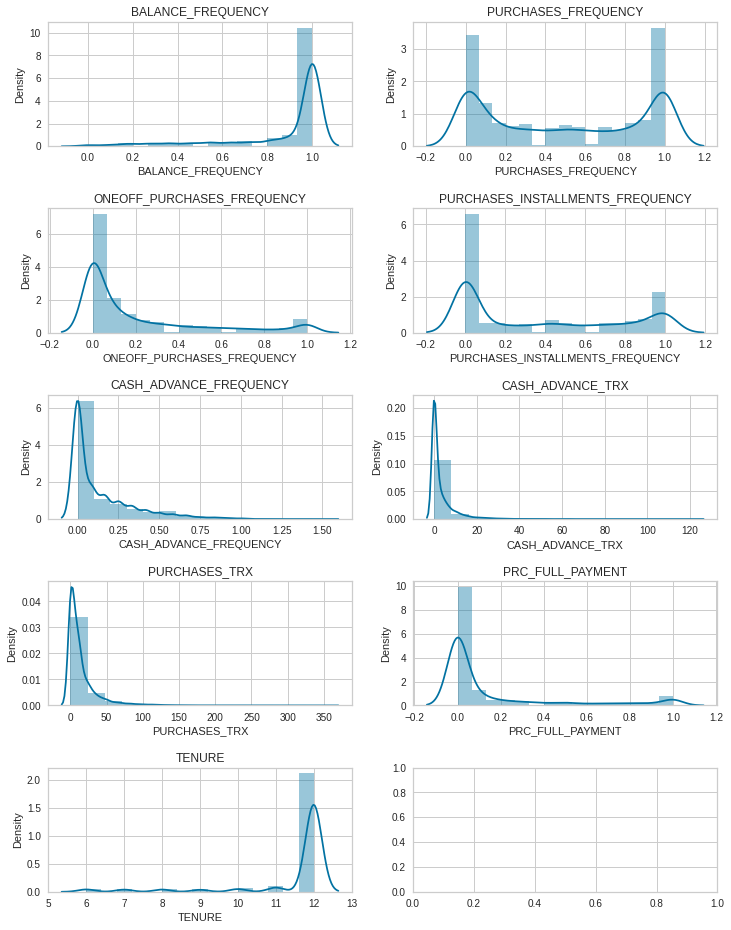

In [13]:
fig, axe = plt.subplots(5,2, figsize=(12,16))
axes = axe.flatten()
for i in range(9):
  sns.distplot(data[freq_col[i]], bins=15, kde=True, ax=axes[i]);
  axes[i].set_title(freq_col[i])
plt.subplots_adjust(hspace=0.5)
plt.show()


* pada kolom BALANCE_FREQUENCY, mayoritas pengguna berada pada skala lebih dari 0.9. hal ini menujukan bahwa mayoritas pengguna rajin melakukan pembaharuan pada saldonya.
* pada kolom PURCHASE_FREQUENCY, terdapat 2 peak yang mencolok yaitu pada skala rendah dan tinggi. hal ini menujukan bahwa ada 2 golongan mayoritas pengguna, yaitu pengguna yang gemar berbelanja dan yang tidak.
* pada kolom ONEOFF_PURCHASE_FREQUENCY, mayoritas pengguna berada pada skala kurang dari 0.2. hal ini menujukan bahwa mayoritas pengguna membeli produk atau jasa dijangka atau periode waktu tertentu saja.
* pada kolom PURCHASE_INSTALLMENTS_FREQUENCY, terdapat 2 peak mencolok yaitu pada skala rendah dan tinggi. untuk sekala lebih dari 0.9 menujukan bahwa golongan pengguna kredit ini mayoritas transaksinya digunakan untuk pembayaran produk atau jasa secara berkala
* pada kolom CASH_ADVANCE_FREQUENCY, mayoritas pengguna berada di skala 0. hal ini memiliki dua kemungkinan antara memang banyak kredit cash yang tidak terlunasi atau memang pengguna tidak familiar atau tidak gemar melakukan kredit uang cash. CASH_ADVANCE_FREQUENCY akan sangat berkorelasi kuat dengan CASH_ADVANCE_TRX
* pada kolom CASH_ADVANCE_TRX, mayoritas pengguna memiliki jumlah transaksi cash advance sama dengan 0 hal ini mengindikasin bahwa tidak banyak pengguna yang melakukan transaksi jenis ini
* pada kolom PURCHASE_TRX, mayoritas pengguna memiliki jumlah transaksi di rentang 0-25 kali.
* pada kolom PRC_FULL_PAYMENT, mayoritas pengguna memiliki presentase full payment sangat rendah hal ini mengindikasikan bahwa mayoritas pengguna kartu kredit lebih memilih melakukan pembayarn minimum
* pada kolom TENURE, mayoritas tenure pengguna lebih dari 11 bulan.

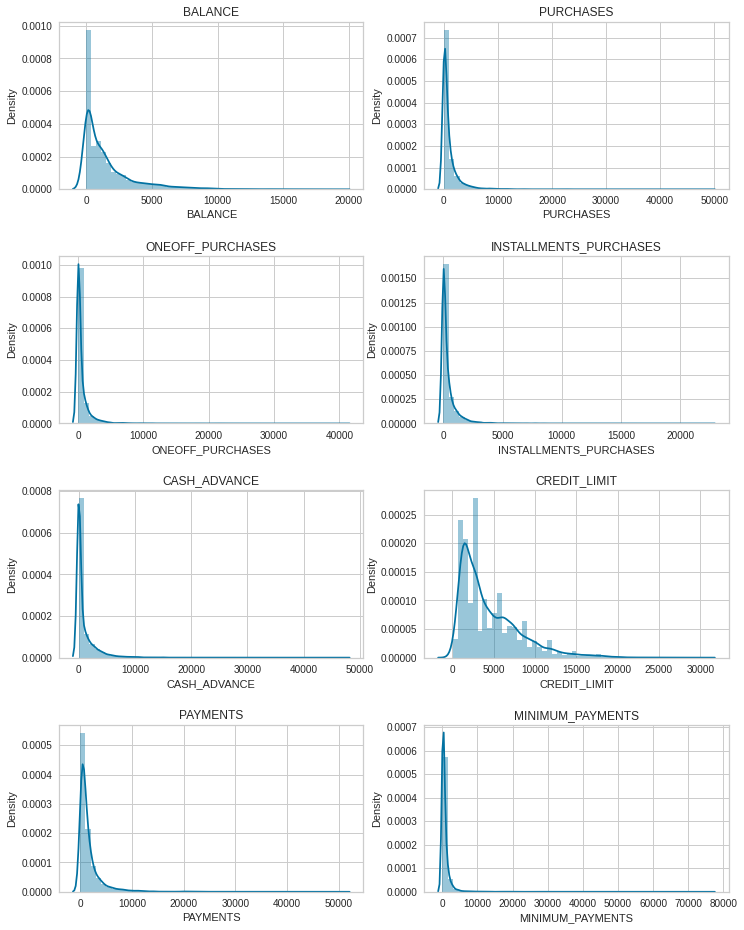

In [14]:
fig, axe = plt.subplots(4,2, figsize=(12,16))
axes = axe.flatten()
for i in range(8):
  sns.distplot(data[num_col[i]], bins=50, kde=True, ax=axes[i]);
  axes[i].set_title(num_col[i])
plt.subplots_adjust(hspace=0.4)
plt.show()

semua distribusi data di atas memiliki skewness positif dengan outliers yang cukup ekstrim untuk beberap histogram

## 5. Data Preprocessing

### a. Data Inference

In [15]:
data_inf = data.sample(50, random_state=23)

memastikan data inference yang terpilih tidak mengandung missing value

In [16]:
data_inf.isnull().sum().sum()

0

drop data inference dari data yang akan di train

In [328]:
data_new = data.drop(data_inf.index, axis=0).drop('CUST_ID', axis=1)
data_new_copy = data_new.copy()

### b. Data Cleaning

melakukan transformasi data menggunakan log untuk meminimalkan efek skewness pada data

In [18]:
data_new = np.log(1+data_new)

**Cek & Handling Outliers**

In [19]:
def outliers_percentage(datas, m):
    q3 = datas.quantile(0.75)
    q1 = datas.quantile(0.25)
    bb = q1 - (q3-q1)*m #batas bawah
    ba = q3 + (q3-q1)*m #batas atas
    outliers =  np.sum((datas < bb) |(datas > ba))
    tots = datas.count()
    return (outliers/tots)*100

In [20]:
for column in data_new.columns:
    datas = data_new[column]
    percent = str(round(outliers_percentage(datas, 1.5), 2))
    print(f'Outliers Kolom "{column}": {percent}%')

Outliers Kolom "BALANCE": 1.47%
Outliers Kolom "BALANCE_FREQUENCY": 19.19%
Outliers Kolom "PURCHASES": 0.0%
Outliers Kolom "ONEOFF_PURCHASES": 0.0%
Outliers Kolom "INSTALLMENTS_PURCHASES": 0.0%
Outliers Kolom "CASH_ADVANCE": 0.0%
Outliers Kolom "PURCHASES_FREQUENCY": 0.0%
Outliers Kolom "ONEOFF_PURCHASES_FREQUENCY": 5.39%
Outliers Kolom "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers Kolom "CASH_ADVANCE_FREQUENCY": 3.78%
Outliers Kolom "CASH_ADVANCE_TRX": 0.17%
Outliers Kolom "PURCHASES_TRX": 0.0%
Outliers Kolom "CREDIT_LIMIT": 0.07%
Outliers Kolom "PAYMENTS": 3.57%
Outliers Kolom "MINIMUM_PAYMENTS": 1.65%
Outliers Kolom "PRC_FULL_PAYMENT": 15.96%
Outliers Kolom "TENURE": 15.28%


* mayoritas kolom memiliki outlier lebih besar dari 5%
* kolom PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY merupakan kolom bebas outliers
* handling outliers dengan cara trimming sangat tidak disarankan oleh karena itu penulis akan melakukan capping

karena hampir semua kolom memiliki outliers dengan presentase yang sangat tinggi, maka penulis akan memperlaukan data outliers sebagai missing value dan melakukan imputasi dengan KNN imputer, dimana nilainya akan di imputasi dengan nilai rata rata n_neighbors terdekat

**Handling Missing Value**

In [21]:
for i in data_new.columns:
    datas = data_new[i]
    
    q3 = datas.quantile(0.75)
    q1 = datas.quantile(0.25)
    bb = q1 - (q3-q1)*1.5 #batas bawah
    ba = q3 + (q3-q1)*1.5 #batas atas
 
    outliers = ((datas < bb) |(datas > ba))
    data_new[i].loc[outliers] = np.nan;
    
data_new.isnull().sum()

BALANCE                              131
BALANCE_FREQUENCY                   1708
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           480
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               336
CASH_ADVANCE_TRX                      15
PURCHASES_TRX                          0
CREDIT_LIMIT                           7
PAYMENTS                             318
MINIMUM_PAYMENTS                     455
PRC_FULL_PAYMENT                    1420
TENURE                              1360
dtype: int64

entri data outliers untuk setiap kolom sudah di convert ke dalam bentuk NaN, selanjutnya akan dilakukan imputasi menggunakan KNN imputer

In [22]:
imputer = KNNImputer()
data_impute = imputer.fit_transform(data_new)
data_new2 = pd.DataFrame(data_impute, columns=data_new.columns)
data_new2.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

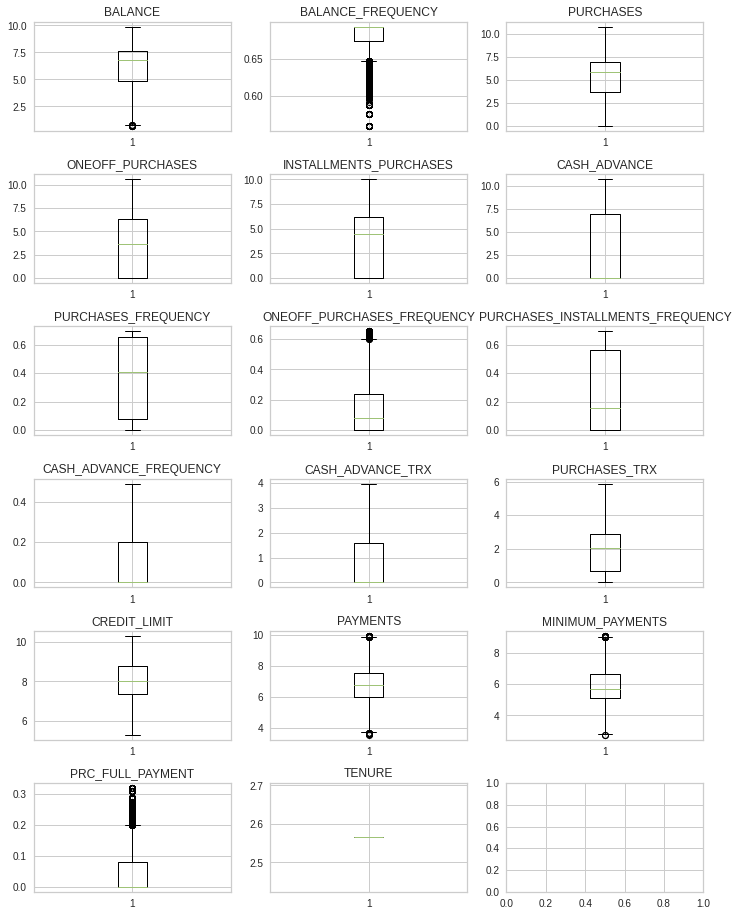

In [23]:
fig, axe = plt.subplots(6,3, figsize=(12,16))
axes = axe.flatten()
for i,j in enumerate(data_new2):
  axes[i].boxplot(data_new2[j]);
  axes[i].set_title(j)
plt.subplots_adjust(hspace=0.4)
plt.show()

### c. Data Scaling

In [24]:
std = StandardScaler()
data_new2_scaled = std.fit_transform(data_new2)

In [25]:
data_new2_scaled_df = pd.DataFrame(data_new2_scaled, columns=data_new2.columns)
data_new2_scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.303930,-3.080900,-0.113739,-0.986220,0.393530,-0.930030,-0.747705,-0.759306,-0.675410,-0.771332,-0.812661,-0.580050,-1.457842,-1.334930,-0.857951,-0.600497,0.0
1,0.975979,-1.235399,-1.679600,-0.986220,-1.088211,1.528766,-1.303443,-0.759306,-0.959272,0.869217,0.795201,-1.379180,0.927635,1.354037,0.999022,2.065614,0.0
2,0.844818,0.524233,0.600309,1.062134,-1.088211,-0.930030,1.195459,1.813319,-0.959272,-0.771332,-0.812661,0.486563,1.012239,-0.331385,0.509915,-0.600497,0.0
3,0.632782,0.524233,0.827015,1.265814,-1.088211,0.564635,-1.014878,-0.345905,-0.959272,-0.182861,-0.120193,-0.874985,1.012239,0.512626,0.563152,-0.600497,0.0
4,0.258755,0.524233,-0.708513,-0.113760,-1.088211,-0.930030,-1.014878,-0.345905,-0.959272,-0.771332,-0.812661,-0.874985,-1.234441,-0.254081,-0.347228,-0.600497,0.0


In [26]:
data_new2_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8900.0,-3.014162e-16,1.000056,-2.896712,-0.697939,0.294056,0.744008,1.913099
BALANCE_FREQUENCY,8900.0,-6.201862e-15,1.000056,-4.526633,-0.179620,0.524233,0.524233,0.524233
PURCHASES,8900.0,1.987561e-15,1.000056,-1.679600,-0.407125,0.339801,0.724603,2.022251
ONEOFF_PURCHASES,8900.0,-6.724833e-15,1.000056,-0.986220,-0.986220,0.138563,0.971911,2.282722
INSTALLMENTS_PURCHASES,8900.0,7.664780e-16,1.000056,-1.088211,-1.088211,0.373798,0.907472,2.162084
CASH_ADVANCE,8900.0,-1.214709e-15,1.000056,-0.930030,-0.930030,-0.930030,1.036947,2.086618
PURCHASES_FREQUENCY,8900.0,-2.619627e-18,1.000056,-1.303443,-1.014878,0.158321,1.042026,1.195459
ONEOFF_PURCHASES_FREQUENCY,8900.0,-1.198035e-14,1.000056,-0.759306,-0.759306,-0.345905,0.486241,2.600833
PURCHASES_INSTALLMENTS_FREQUENCY,8900.0,-1.325831e-15,1.000056,-0.959272,-0.959272,-0.412592,1.025346,1.498900
CASH_ADVANCE_FREQUENCY,8900.0,-1.449777e-15,1.000056,-0.771332,-0.771332,-0.771332,0.703996,2.849352


Kolom Tenure memiliki satu unique value saja yaitu nol, sehingga penulis akan memutuskan untuk melakuka drop kolom ini.

In [27]:
#data_new2_scaled_df = data_new2_scaled_df.drop('TENURE', axis=1)

### d. Multicollinearity

In [28]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_new2_scaled_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_new2_scaled_df.values, i) for i in range(len(data_new2_scaled_df.columns))]

vif_data

,feature,VIF
0,BALANCE,4.686602
1,BALANCE_FREQUENCY,1.224962
2,PURCHASES,11.530195
3,ONEOFF_PURCHASES,7.433033
4,INSTALLMENTS_PURCHASES,8.167172
5,CASH_ADVANCE,6.410067
6,PURCHASES_FREQUENCY,15.066641
7,ONEOFF_PURCHASES_FREQUENCY,6.750920
8,PURCHASES_INSTALLMENTS_FREQUENCY,13.319184
9,CASH_ADVANCE_FREQUENCY,9.072022


* dari data VIF diatas jika penulis berkeyakinan bahwa theresheold untuk multikolineritas adalah 5, maka kolom dengan nilai VIF kurang dari 5 adalah BALANCE, BALANCE_FREQUENCY, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, DAN PRC_FULL_PAYMENT
* karena ada 6 kolom yang tidak multikolinier maka sisanya 10 kolom adalah salig multikolinier sehingga dimensi dapat dilakukan reduksi menjadi 7 dimensi

### e. Dimention Reduction dengan PCA

In [29]:
pca_scaled=PCA(n_components=16).fit(data_new2_scaled_df)
pca_scaled.explained_variance_ratio_

array([0.36462714, 0.22974976, 0.10042367, 0.08255768, 0.05763659,
       0.04862693, 0.03661944, 0.02398218, 0.01524222, 0.01050308,
       0.00845487, 0.00784311, 0.00604817, 0.00303438, 0.00285793,
       0.00179285])

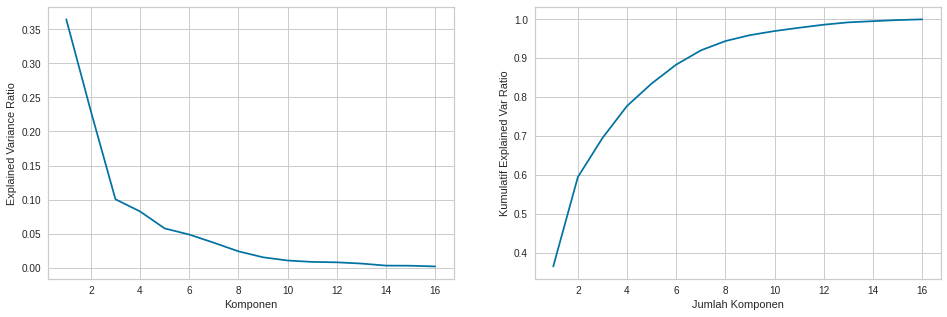

In [30]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,17),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,17),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')

plt.show()

* dari plot di atas terlihat terjadi patahan pada komponen 3, hanya saja kumulatif variance nya bernilai 70 % saja jadi untuk komponen ini kurang ideal
* pada komponen 7, tampak bahwa dengan menggunakan 7 dimensi nilai kumulatif explained var rationya adalah lebih dari 90 %. hal ini menujukan bahwa dengan menggunakan dimensi 7 sudah mampu menjelaskan 90 % variansi data.
* penulis memutuskan bahwa komponen yang ideal adalah 7 dengan cumsum EVR 90 %

In [31]:
pca = PCA(n_components=0.9, random_state=23)
pca.fit(data_new2_scaled_df)
names = []
for i in range(1, len(pca.components_)+1):
  a = 'PC ' + str(i)
  names.append(a)
pca_data = pd.DataFrame(pca.transform(data_new2_scaled_df), columns=names)
pca_data.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7
0,-0.172790,-3.651028,0.157047,0.450234,1.029536,2.294623,0.856305
1,-3.385474,0.749734,0.233238,2.444406,-1.847573,0.087081,1.277353
2,1.291311,1.086832,2.199858,-1.691222,-0.167670,0.032520,-0.349989
3,-1.122784,1.084364,1.646199,-0.820463,-0.753965,0.252784,-0.186078
4,-1.135148,-1.629865,0.953782,-1.615244,-0.241363,-0.453018,0.908468


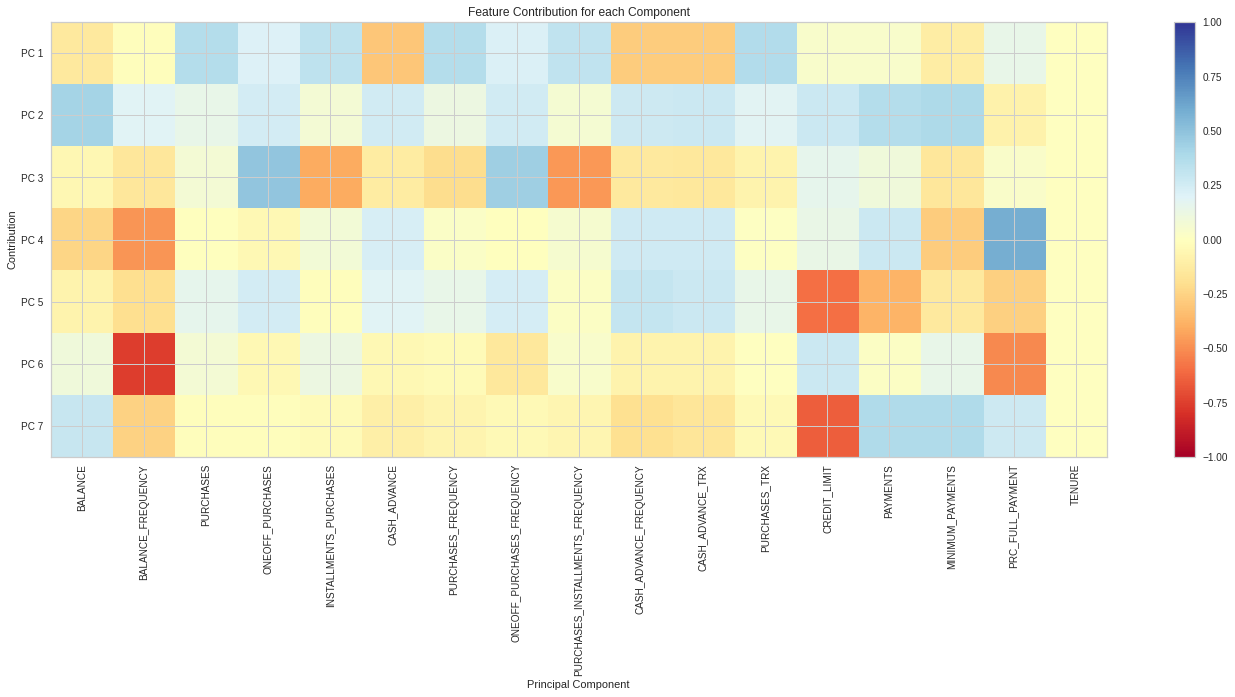

In [32]:
fig, ax = plt.subplots(figsize=(24, 8))
plt.imshow(pca.components_, cmap='RdYlBu', vmin=-1, vmax=1)
plt.xticks(range(len(data_new2_scaled_df.columns)), data_new2_scaled_df.columns, rotation=90)
plt.yticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel('Principal Component')
plt.ylabel('Contribution')
plt.title('Feature Contribution for each Component')
plt.colorbar()

* ONEOFF_PURCHASES, INSTALLMENT_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, dan PURCHASE_INSTALLMENTS_FREQUENCY berkontribusi sangat kuat pada PC3
* BALANCE_FREQUENCY dan PRC_FULL_PAYMENT berkontribusi sangat kuat pada PC4
* PAYMENTS dan CREDIT_LIMIT berkontribusi sangat kuat pada PC5
* BALANCE_FREQUENCY dan PRC_FULL_PAYMENT berkontribusi sangat kuat pada PC6

In [46]:
pca2 = PCA(n_components=2, random_state=23)
pca2.fit(data_new2_scaled_df)
names2 = []
for i in range(1, 3):
  b = 'PC ' + str(i)
  names2.append(b)
pca_data2 = pd.DataFrame(pca2.transform(data_new2_scaled_df), columns=names2)

## 6. Model Definition

In [33]:
model_kmeans = 'KMeans(n_clusters=k, random_state=23)'

In [128]:
db = DBSCAN()

In [388]:
hr = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

## 7. Model Training

In [34]:
kmeans_per_k = [eval(model_kmeans).fit(pca_data)
                for k in range(1, 11)]

In [129]:
db.fit(pca_data)

DBSCAN()

In [389]:
hr.fit(pca_data)

AgglomerativeClustering(n_clusters=3)

## 8. Model Evaluation

### Kmeans Clustering

**Elbow Method**

untuk menentukan nilai cluster yang ideal pada model ini, maka digunakan elbow method sebagai berikut 

In [35]:
inertias = [model.inertia_ for model in kmeans_per_k]

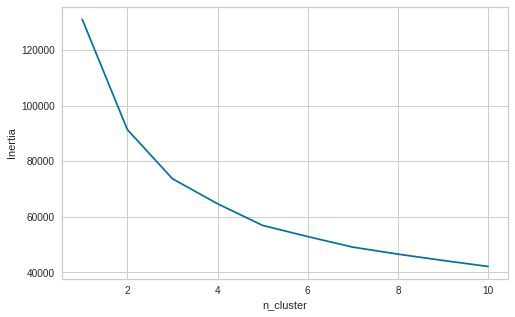

In [36]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertias)
plt.xlabel('n_cluster')
plt.ylabel('Inertia')

plt.show()

In [37]:
dif = list(pd.DataFrame(inertias).diff().values.reshape(1,10)[0][1:10])
pd.DataFrame({'Cluster': np.arange(1,10), 'diff': dif})

,Cluster,diff
0,1,-39651.348458
1,2,-17696.647300
2,3,-8994.209606
3,4,-7794.458370
4,5,-4019.648715
5,6,-3797.819648
6,7,-2519.218659
7,8,-2277.991743
8,9,-2153.658435


berdasarkan elbow method dan meninjau selisih nilai inertia ditemukan daerah patahan terjadi di titik n_cluster=3, sehingga nilai cluster yang optimal untuk model ini adalah 3 cluster

**Shilloute Score**

sebagai pembanding, dilakukan evaluasi menggunakan shilloute score untuk menentukan penggunaan cluster berapa yang paling optimal

In [38]:
silhouette_scores = [silhouette_score(pca_data, model.labels_)
                     for model in kmeans_per_k[1:]]

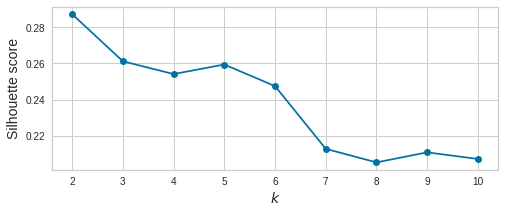

In [39]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

berdasarkan shilloute score di atas nilai shilloute score yang penulis yakini paling optimal adalah pada cluster 2, 3, 4, dan 5. karena disini masih cukup ambigu, maka penulis lakukan visualisasi tiap shilloute coeficient untuk masing masing label cluster, dan di dapatkan hasil sebagai berikut :

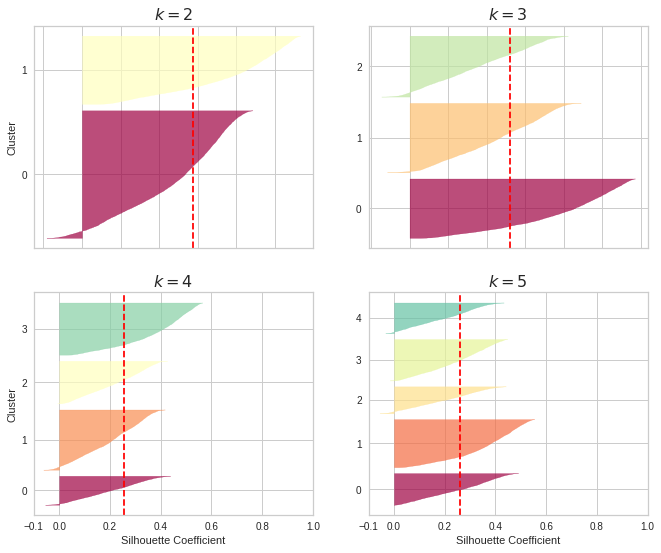

In [40]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(pca_data, y_pred)

    padding = len(pca_data) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

berdasarkan shilloute coeficient di atas dan didukung dengan elbow method maka penulis memutuskan untuk menggunakan 3 clusters. dapat dilihat bahwa pada k=3 hampir shilloute score dari semua label melewati garis merah rata-rata dan juga k=3 memiliki lebar yang hampir mirip2

In [74]:
labels = kmeans_per_k[2].fit_predict(pca_data)

In [334]:
og_data = data_new_copy.copy()
scaled_data = data_new2_scaled_df.copy()
pca_data_copy = pca_data.copy()

og_data['LABELS'] = labels
scaled_data['LABELS'] = labels
pca_data_copy['LABELS'] = labels
pca_data2['LABELS'] = labels

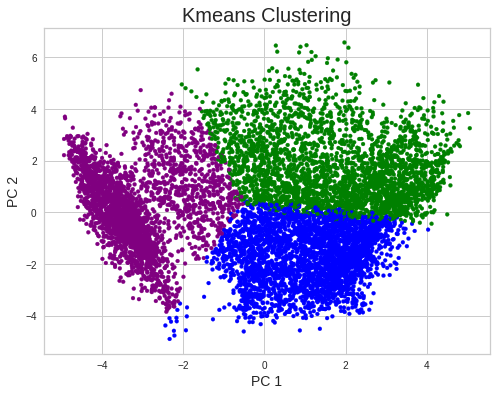

In [140]:
colors=['purple','red','blue','green']
plt.figure(figsize=(8,6))
plt.scatter(pca_data2['PC 1'],pca_data2['PC 2'],c=pca_data2['LABELS'],cmap=mpl.colors.ListedColormap(colors),s=15)
plt.title('Kmeans Clustering',fontsize=20)
plt.xlabel('PC 1',fontsize=14)
plt.ylabel('PC 2',fontsize=14)
plt.show()

### DBSCAN

In [130]:
labels2 = db.fit_predict(pca_data)

In [329]:
pca_data2_db = pca_data2.copy()

pca_data2_db['LABELS'] = labels2

In [132]:
pca_data2_db.LABELS.unique()

array([-1,  3,  0,  1, 27, 40,  2,  5, 43,  4, 26, 69, 52,  6,  7, 32,  8,
        9, 41, 29, 10, 11, 23, 44, 12, 13, 14, 15, 71, 48, 42, 36, 55, 16,
       17, 53, 21, 20, 18, 22, 56, 19, 65, 54, 45, 24, 25, 39, 28, 50, 31,
       30, 67, 33, 34, 35, 73, 37, 38, 66, 63, 51, 74, 59, 77, 46, 47, 61,
       75, 49, 70, 72, 62, 64, 57, 58, 60, 68, 76])

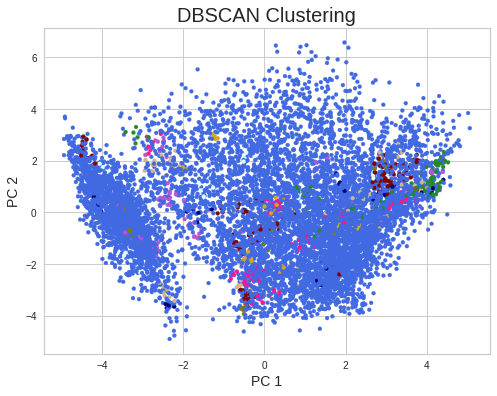

In [143]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
plt.figure(figsize=(8,6))
plt.scatter(pca_data2_db['PC 1'],pca_data2_db['PC 2'],c=pca_data2_db['LABELS'],cmap=mpl.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('PC 1',fontsize=14)
plt.ylabel('PC 2',fontsize=14)
plt.show()

cluster masih belum terbentuk, penulis akan melakukan penyesuaian hyperparameter

In [155]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(pca_data)
distances, indices = nbrs.kneighbors(pca_data)

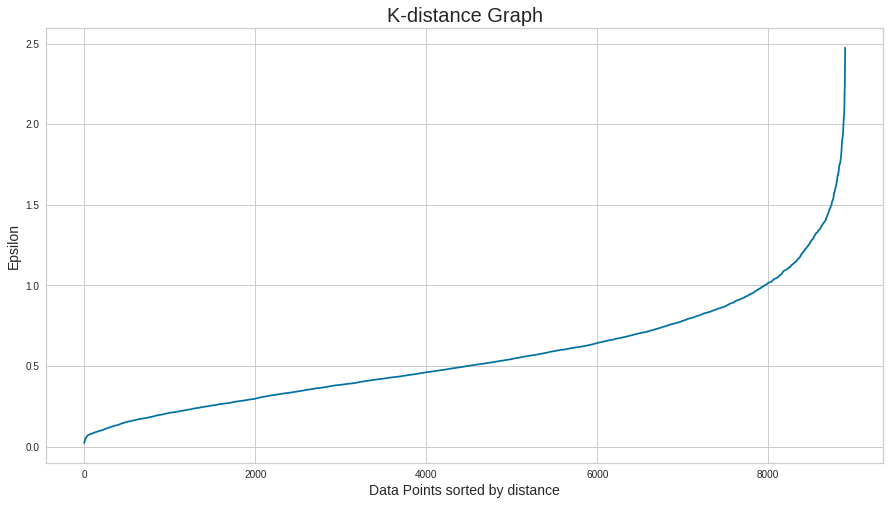

In [158]:
distances2 = np.sort(distances, axis=0)
distances3 = distances2[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances3)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

berdasarkan visual di atas, nilai epsilon yang optimal berada di rentang 1 hingga 1.5. penulis akan mengambil nilai epsilon = 1.1 dengan nilai min_sample = 2*dim + 1

In [303]:
db2 = DBSCAN(eps=1.2, min_samples=15)
db2.fit(pca_data)
labels2 = db2.fit_predict(pca_data)

In [330]:
pca_data2_db = pca_data2.copy()

pca_data2_db['LABELS'] = labels2

In [305]:
pca_data2_db.LABELS.unique()

array([ 0,  1, -1])

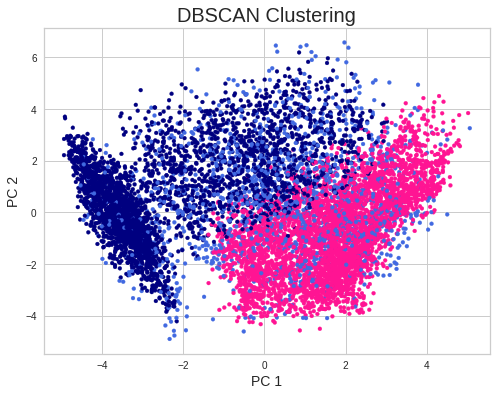

In [306]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
plt.figure(figsize=(8,6))
plt.scatter(pca_data2_db['PC 1'],pca_data2_db['PC 2'],c=pca_data2_db['LABELS'],cmap=mpl.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('PC 1',fontsize=14)
plt.ylabel('PC 2',fontsize=14)
plt.show()

### Hierarchical Clustering

In [391]:
labels_hr = hr.labels_

In [397]:
og_data_hr = data_new_copy.copy()
scaled_data_hr = data_new2_scaled_df.copy()
pca_data_copy_hr = pca_data.copy()
pca_data2_hr = pca_data2.copy()

og_data_hr['LABELS'] = labels_hr
scaled_data_hr['LABELS'] = labels_hr
pca_data_copy_hr['LABELS'] = labels_hr
pca_data2_hr['LABELS'] = labels_hr

In [398]:
pca_data2_hr.LABELS.unique()

array([0, 2, 1])

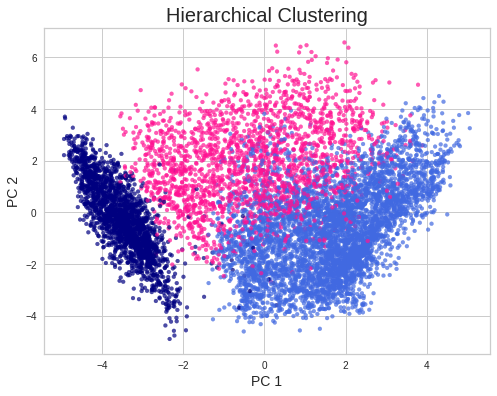

In [399]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
plt.figure(figsize=(8,6))
plt.scatter(pca_data2_hr['PC 1'],pca_data2_hr['PC 2'],c=pca_data2_hr['LABELS'],cmap=mpl.colors.ListedColormap(colors),s=15, alpha=0.7)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('PC 1',fontsize=14)
plt.ylabel('PC 2',fontsize=14)
plt.show()

sejauh ini secara visual Hierarchical clustering melakukan clustering paling baik, hal ini bisa terlihat pada clusetr biru tua yang dapat terkluster dengan baik.

## 9. EDA PART 2

dalam eda part 2 ini, penulis akan melakukan analisa clustering hasil dari k-means clustering.

In [44]:
def spider_plot(data):
  categories = data.columns[0:-1]
  label0 = data.groupby("LABELS").mean().to_numpy()[0]
  label1 = data.groupby("LABELS").mean().to_numpy()[1]
  label2 = data.groupby("LABELS").mean().to_numpy()[2]
  label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(label0))
  plt.figure(figsize=(8, 8))
  plt.subplot(polar=True)
  plt.plot(label_loc, label0, label='Label 0')
  plt.plot(label_loc, label1, label='Label 1')
  plt.plot(label_loc, label2, label='Label 2')
  lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
  plt.legend()
  plt.show()

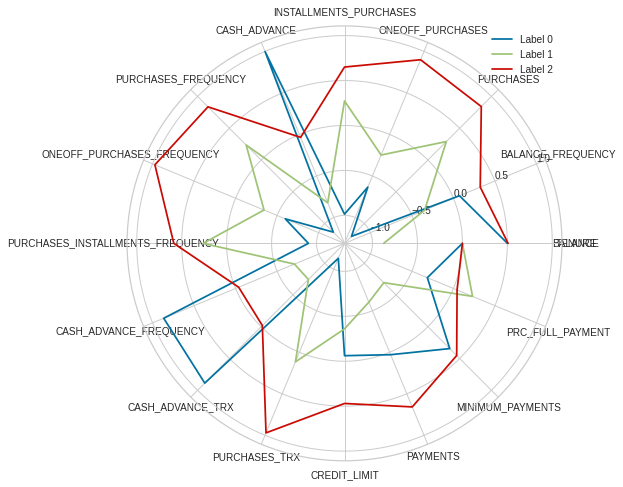

In [403]:
spider_plot(scaled_data)

* kluster dengan label 1 memiliki rata-rata balance paling rendah, sedangkan kluster label 0 dan 2 cenderung memiliki rata-rata yang hampir sama
* secara jenis transaksi, kelas yang paling dominan melakukan transaksi berupa cash advance adalah kelas biru degan label 0. dapat dilihat bahwa jumlah CASH_ADVANCE paling besar, kemudian transaki CASH_ADVANCE juga paling sering dibanding 2 kluster lainya
* kelas dengan label 0 dan 2 memiliki rata-rata balance yang mirip. namun secara frequency kelas 2 paling unggul, ini artinya kelas 2 lebih sering memperbaharui balancenya atau dalam artian kelas 2 terindikasi loyal.
* kluster dengan label 1 selain memiliki balance yang tinggi, kelas ini juga memiliki tingkat konsumtif yang tinggi, hal ini ditandai dengan tingkat PURCHASES yang tinggi, baik itu jenis ONEOFF maupun Installment sekalipun.
* walaupun cluster label 1 memiliki balance paling kecil di antara yang lain, namun cluster ini memiliki presentase pembayaran secara full paling tinggi dibanding cluster lainya 

Text(0, 0.5, 'CREDIT_LIMIT Means')

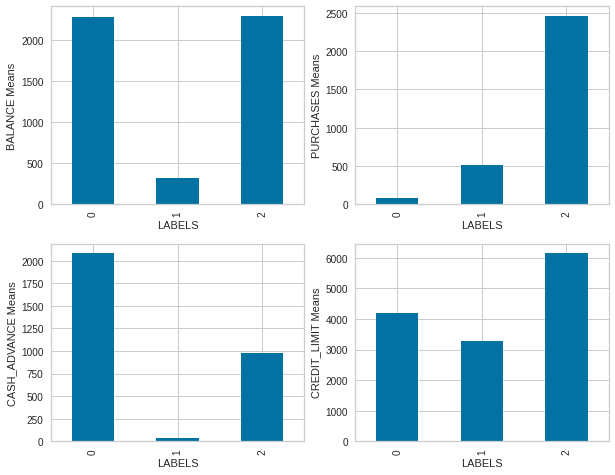

In [343]:
fig, axe = plt.subplots(2,2, figsize=(10,8))
axes = axe.flatten()
og_data.groupby('LABELS')['BALANCE'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_ylabel('BALANCE Means')
og_data.groupby('LABELS')['PURCHASES'].mean().plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('PURCHASES Means')
og_data.groupby('LABELS')['CASH_ADVANCE'].mean().plot(kind='bar', ax=axes[2])
axes[2].set_ylabel('CASH_ADVANCE Means')
og_data.groupby('LABELS')['CREDIT_LIMIT'].mean().plot(kind='bar', ax=axes[3])
axes[3].set_ylabel('CREDIT_LIMIT Means')

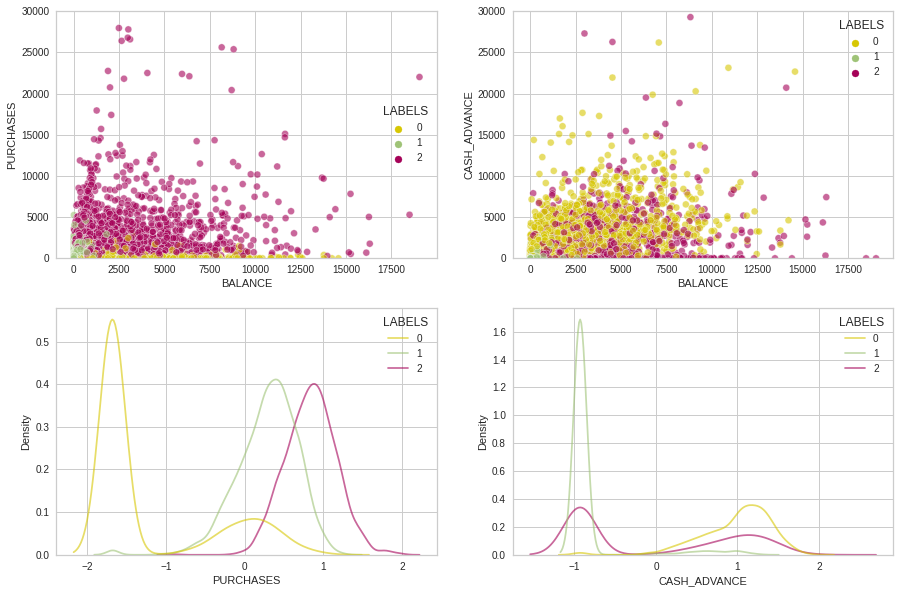

In [373]:
figs, axe = plt.subplots(2,2, figsize=(15,10))
axes = axe.flatten()
LABEL_COLOR_MAP = {0 : 'y', 1 : 'g', 2 : 'm'}
sns.scatterplot(data=og_data, x="BALANCE", y="PURCHASES", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, ax=axes[0])
axes[0].set_ylim(0,30000)
sns.scatterplot(data=og_data, x="BALANCE", y="CASH_ADVANCE", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, ax=axes[1])
axes[1].set_ylim(0,30000)
sns.kdeplot(data=scaled_data, x="PURCHASES", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, ax=axes[2])
sns.kdeplot(data=scaled_data, x="CASH_ADVANCE", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, ax=axes[3])

cluster 0 dan 2 sama sama memiliki balance yang tinggi, namun apa yang membuat 2 cluster ini berbeda? 
<br>
<br>
dari visual diatas ditemukan fakta bahwa, cluster label 2 mengalokasikan mayoritas balance ke purchase atau pembelian produk, sedangkan untuk cluster 0 mengalokasikan balancenya ke dalam bentuk transaksi atau pinjaman secara tunai

dari temuan2 diatas penulis dapat menuliskan hipotesa untuk masing masing cluster antara lain sebagai berikut :
* **Label 0** merupakan clusters **Cash Oriented**. cluster ini memiliki balance yang tinggi, namun Purchase sangat rendah sekali hanya saja mayoritas transaksi dan pinjamanya dilakukan secara tunai.
* **Label 1** merupakan clusters **Low Budget, High Demand**. cluster ini memiliki balance yang relatif kecil, namun jumlah dan nominal PURCHASES lumayan tinggi.jenis purchase yang paling dominan adalah jenis installment. penulis menduga bahwa cluster ini di dominasi oleh para pensiunan dimana cluster ini dominan hanya menggunakan kredit cardnya untuk membayar tagihan installment saja
* **Label 2** merupakan clusters **High Budget, High Demand**. cluster ini memiliki balance tinggi dengan tingkat konsumtifitas juga tinggi. jenis purchase apapun baik itu oneoff maupun installment semuanya sama tinggi baik secara nominal maupun jumlah. penulis menduga cluster ini didominasi oleh para pekerja atau seseorang yang berumah tangga, dapat dilihat bahwa selain balance yang tinggi cluster ini juga konsumtif

## 10. Model INFERENCE

In [311]:
data_inf.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5655,C15813,1593.655423,1.0,358.70,111.30,247.40,618.455892,0.416667,0.083333,0.250000,0.250000,5,8,2000.0,467.499859,449.473659,0.000000,12
7366,C17567,63.292505,1.0,545.38,0.00,545.38,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,4000.0,520.936337,156.600058,0.166667,12
2911,C12995,607.912561,1.0,205.84,205.84,0.00,1076.492197,0.250000,0.250000,0.000000,0.250000,3,3,6000.0,258.631069,202.931870,0.000000,12
1907,C11969,5283.566994,1.0,202.31,116.09,86.22,1564.285475,0.333333,0.166667,0.166667,0.666667,17,5,9500.0,1384.838966,1266.931932,0.000000,12
7953,C18168,401.822565,1.0,518.23,116.23,402.00,0.000000,0.500000,0.166667,0.333333,0.000000,0,8,1700.0,160.689352,190.313074,0.000000,12


In [312]:
data_inf2 = data_inf.drop('CUST_ID', axis=1)

In [313]:
data_inf2 = np.log(1+data_inf2)
data_inf2_scaled = std.transform(data_inf2)

In [314]:
names_inf = []
for i in range(1, len(pca.components_)+1):
  a_inf = 'PC ' + str(i)
  names_inf.append(a_inf)
pca_data_inf = pd.DataFrame(pca.transform(data_inf2_scaled), columns=names)
pca_data_inf.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7
0,-0.638506,0.989509,-0.790688,-0.329918,1.356077,-0.217666,-0.286211
1,2.172771,-1.561262,-1.494104,0.560309,-1.021121,-0.809130,-0.459295
2,-1.468480,0.465474,1.178259,-0.270032,0.852289,-0.354821,-1.600677
3,-2.041913,3.397297,-0.575420,0.648904,0.679199,0.161153,-1.174904
4,1.326898,-1.248783,-0.083929,-1.529388,0.784381,-0.163861,-0.295698


In [315]:
labels_inf = kmeans_per_k[2].predict(pca_data_inf)

In [318]:
data_inf_kmean = data_inf.copy()
data_inf_kmean['LABELS'] = labels_inf

data_inf_kmean.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS
5655,C15813,1593.655423,1.000000,358.70,111.30,247.40,618.455892,0.416667,0.083333,0.250000,0.250000,5,8,2000.0,467.499859,449.473659,0.000000,12,2
7366,C17567,63.292505,1.000000,545.38,0.00,545.38,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,4000.0,520.936337,156.600058,0.166667,12,1
2911,C12995,607.912561,1.000000,205.84,205.84,0.00,1076.492197,0.250000,0.250000,0.000000,0.250000,3,3,6000.0,258.631069,202.931870,0.000000,12,0
1907,C11969,5283.566994,1.000000,202.31,116.09,86.22,1564.285475,0.333333,0.166667,0.166667,0.666667,17,5,9500.0,1384.838966,1266.931932,0.000000,12,0
7953,C18168,401.822565,1.000000,518.23,116.23,402.00,0.000000,0.500000,0.166667,0.333333,0.000000,0,8,1700.0,160.689352,190.313074,0.000000,12,1
8679,C18916,1031.037548,1.000000,0.00,0.00,0.00,1117.043527,0.000000,0.000000,0.000000,0.181818,8,0,1200.0,157.740697,2021.959242,0.000000,11,0
4653,C14779,200.988312,0.181818,0.00,0.00,0.00,1864.566564,0.000000,0.000000,0.000000,0.083333,5,0,2500.0,9724.871142,332.480788,1.000000,12,1
2614,C12690,909.560162,1.000000,912.10,669.88,242.22,752.060162,0.250000,0.250000,0.166667,0.416667,11,16,1200.0,1476.333722,668.368282,0.083333,12,2
6955,C17144,561.157673,1.000000,0.00,0.00,0.00,244.504364,0.000000,0.000000,0.000000,0.166667,4,0,1500.0,456.999782,266.673655,0.000000,12,0
8507,C18738,439.357199,1.000000,862.74,862.74,0.00,90.322514,0.666667,0.666667,0.000000,0.250000,4,22,1000.0,789.180188,208.767820,0.000000,12,2


In [378]:
data_inf_kmean['LABELS'].value_counts()

0    20
1    17
2    13
Name: LABELS, dtype: int64

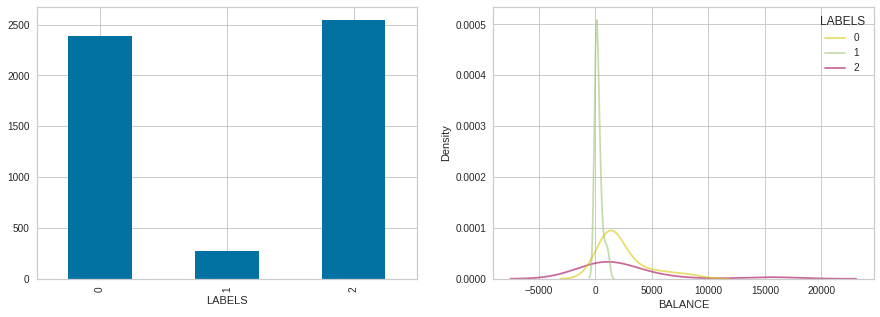

In [384]:
fig, axe = plt.subplots(1,2, figsize=(15,5))
data_inf_kmean.groupby('LABELS')['BALANCE'].mean().plot(kind='bar', ax=axe[0]);
sns.kdeplot(data=data_inf_kmean, x="BALANCE", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, ax=axe[1])

pada data inference, cluster 0 dan 2 memiliki rata-rata balance lebih tinggi dari cluster 1. hal ini membuktikan bahwa fakta ini valid dan cocok dengan analisa penulis atas data train

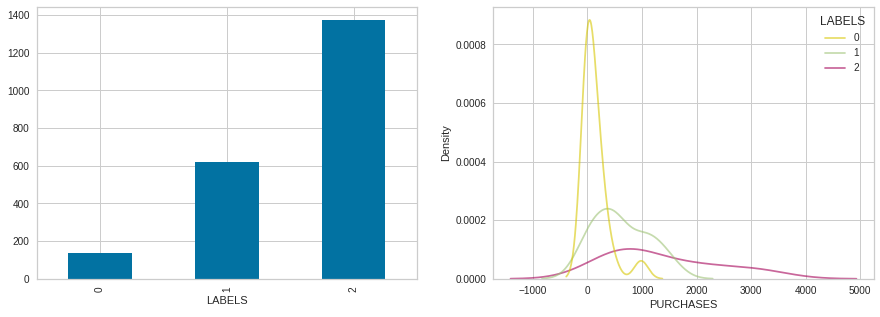

In [385]:
fig, axe = plt.subplots(1,2, figsize=(15,5))
data_inf_kmean.groupby('LABELS')['PURCHASES'].mean().plot(kind='bar', ax=axe[0]);
sns.kdeplot(data=data_inf_kmean, x="PURCHASES", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, ax=axe[1])

pada data inference, label 2 memiliki rata-rata purchases paling tinggi, sedangkan label 0 paling rendah. hal ini sesuai dengan analisa penulis sebelumnya bahwa untuk cluster 2 selain balance yang tinggi, cluster ini juga sangat konsumtif.

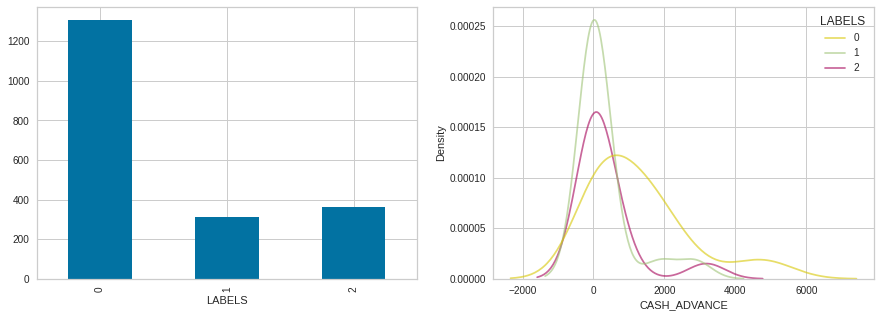

In [386]:
fig, axe = plt.subplots(1,2, figsize=(15,5))
data_inf_kmean.groupby('LABELS')['CASH_ADVANCE'].mean().plot(kind='bar', ax=axe[0]);
sns.kdeplot(data=data_inf_kmean, x='CASH_ADVANCE', hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, ax=axe[1])

pada data inference, label 0 memiliki rata-rata cash advance paling tinggi. hal ini sesuai dengan analisa penulis sebelumnya, mengingat bahwa label 0 merupakan cluster **cash oriented**

## 11. Kesimpulan

* dari hasil reduksi PCA dan multikoliner, dari yang semulanya 17 fitur dapat di lakukan reudksi hingga 7 principle component saja
* untuk k-means clustering berdasrkan elbow method dan shilloute score di dapatkan bahwa jumlah cluster terbaik untuk model adalah sejumlah 3 cluster.
* untuk DBSCAN hyperparameter yang ideal untuk model adalah menggunakan epsilon = 1.2 dan min_sample = 15
* dari model clustering di dapatkan 3 cluster customer yaitu label 0 merupakan customer tipe cash oriented, label 1 customer tipe low balance & high demand, dan label 2 merupakan customer tipe high balance & high demand.
* jika di pandang secara bisnis, cluster yang paling loyal dan menguntungkan adalah cluster 0 dan 2. 2 cluster ini memiliki balance dan balance frequency yang sangat tinggi, artinya selain memiliki balance yang tinggi, cluster2 ini juga sangat rajin melakukan pembaharuan pada balancenya sehingga dapat diindikasikan bahwa customer pada cluster 0 dan 2 ini loyal. walaupun dari segini finasial 2 kluster ini sama2 kuat, namun dari segi transaction behaviour dua cluster ini sangat berbeda. cluster 2 cenderung suka berbelanja atau transaksi secara non cash, sedangkan cluster 0 dominan melakukan transaksi atau pinjaman secara cash.